In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1

* $\alpha$ représente (la procréation - les morts naturels) de l'espèce proie
* $\beta$ caractérise la quantité de proie consommés par les prédateurs, par prédateurs par unité de temps
* $\gamma$ représente (la procréation - les morts naturels) de l'espèce prédateur
* $\delta$ caractérise les morts 

Soit $x_0 = (x_{10}, x_{20})$ un point d'équilibre du système. On a $\begin{cases} \dot{x}_1|_{x_{10}} = 0 \\ \dot{x}_2|_{x_{20}} = 0 \end{cases}$ alors $x_0$ vérifie 
$$
\begin{cases} x_{10}(\alpha - \beta x_{20})=0 \\ -x_{20}(\gamma - \delta x_{10}) = 0 \end{cases}
\iff 
\begin{cases} x_{10} = 0 & \mbox{ou } &\alpha - \beta x_{20}=0 \\ x_{20} = 0 & \mbox{ou } &\gamma - \delta x_{10} = 0 \end{cases}
$$
En considérant les quatre possibilités, les seules compatibles avec la stricte posivité des constantes $\alpha,\beta,\gamma,\delta$ sont $x_0=(0,0)$ et $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ qui appartient donc à $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$

Soit $\varepsilon = (\varepsilon_1, \varepsilon_2)$ une petite variation depuis une position d'équilibre.
* Les deux sont instables?

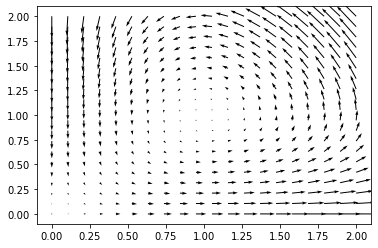

In [46]:
alpha, beta = 1, 1
gamma, delta = 1, 1

def f(Position):    
    x1, x2 = Position
    u = x1 * (alpha - beta * x2)
    v = - x2 * (gamma - delta * x1)
    return np.array([u,v])

N = 20
X = np.linspace(0, 2, N)
Y = np.linspace(0, 2, N)
Grille = np.array(np.meshgrid(X, Y))
A = np.array(Grille.reshape(2, -1))
X, Y = A
B = f(A)
plt.quiver(X, Y, *B)
plt.show()